In [2]:
import pandas as pd

# CSVファイルのパスを指定
file_path = '/workspace/kaggle/dataset/SBAnational.csv'

# CSVファイルを読み込む
df = pd.read_csv(file_path)

# DataFrameの内容を表示
print(df)


/tmp/ipykernel_1382380/1074219465.py:7: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


        LoanNr_ChkDgt                            Name             City State  \
0          1000014003                  ABC HOBBYCRAFT       EVANSVILLE    IN   
1          1000024006     LANDMARK BAR & GRILLE (THE)        NEW PARIS    IN   
2          1000034009           WHITLOCK DDS, TODD M.      BLOOMINGTON    IN   
3          1000044001   BIG BUCKS PAWN & JEWELRY, LLC     BROKEN ARROW    OK   
4          1000054004     ANASTASIA CONFECTIONS, INC.          ORLANDO    FL   
...               ...                             ...              ...   ...   
899159     9995573004                    FABRIC FARMS  UPPER ARLINGTON    OH   
899160     9995603000                    FABRIC FARMS         COLUMBUS    OH   
899161     9995613003    RADCO MANUFACTURING CO.,INC.      SANTA MARIA    CA   
899162     9995973006           MARUTAMA HAWAII, INC.         HONOLULU    HI   
899163     9996003010  PACIFIC TRADEWINDS FAN & LIGHT           KAILUA    HI   

          Zip                          

In [3]:
df.head(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [5]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [6]:
# 指定されたカラムのみを抽出
selected_columns = ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode',
                     'RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status',
                     'ApprovalDate', 'ApprovalFY', 'City', 'State', 'BankState',
                     'DisbursementGross', 'GrAppv', 'SBA_Appv', 'UrbanRural']

df_selected = df[selected_columns]

# 新しいDataFrameの内容を表示
print(df_selected)

        Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  \
0         84      4       2.0          0            0              1   
1         60      2       2.0          0            0              1   
2        180      7       1.0          0            0              1   
3         60      2       1.0          0            0              1   
4        240     14       1.0          7            7              1   
...      ...    ...       ...        ...          ...            ...   
899159    60      6       1.0          0            0              1   
899160    60      6       1.0          0            0              1   
899161   108     26       1.0          0            0              1   
899162    60      6       1.0          0            0              1   
899163    48      1       2.0          0            0              1   

       RevLineCr LowDoc DisbursementDate MIS_Status ApprovalDate ApprovalFY  \
0              N      Y        28-Feb-99      P I F    2

In [26]:
import numpy as np

In [30]:
df[['DisbursementGross',  'GrAppv', 'SBA_Appv', 'BalanceGross', 'ChgOffPrinGr']]= \
df[['DisbursementGross',  'GrAppv', 'SBA_Appv', 'BalanceGross', 'ChgOffPrinGr']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))

df.fillna('NULL', inplace=True)

# MIS_Statusの値を置き換え
df['MIS_Status'] = df['MIS_Status'].replace({'C H G O F F': 0, 'P I F': 1})
# Replace 'NULL' with NaN in the 'MIS_Status' column
df['MIS_Status'] = df['MIS_Status'].replace('NULL', np.nan)

# Convert 'MIS_Status' column to int64, treating NaN as 0
df['MIS_Status'] = pd.to_numeric(df['MIS_Status'], errors='coerce').fillna(0).astype('int64')


# List of columns to convert to numeric
columns_to_convert = ['NewExist','DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']

# Replace non-numeric values with NaN in specified columns
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Now check the data types again
column_data_types = df.dtypes
print(column_data_types)

numeric_columns = df.select_dtypes(include=['number']).columns
  
numeric_columns

/tmp/ipykernel_1382380/1920451399.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['DisbursementGross',  'GrAppv', 'SBA_Appv', 'BalanceGross', 'ChgOffPrinGr']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))


LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status             int64
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object


Index(['LoanNr_ChkDgt', 'Zip', 'NAICS', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv'],
      dtype='object')

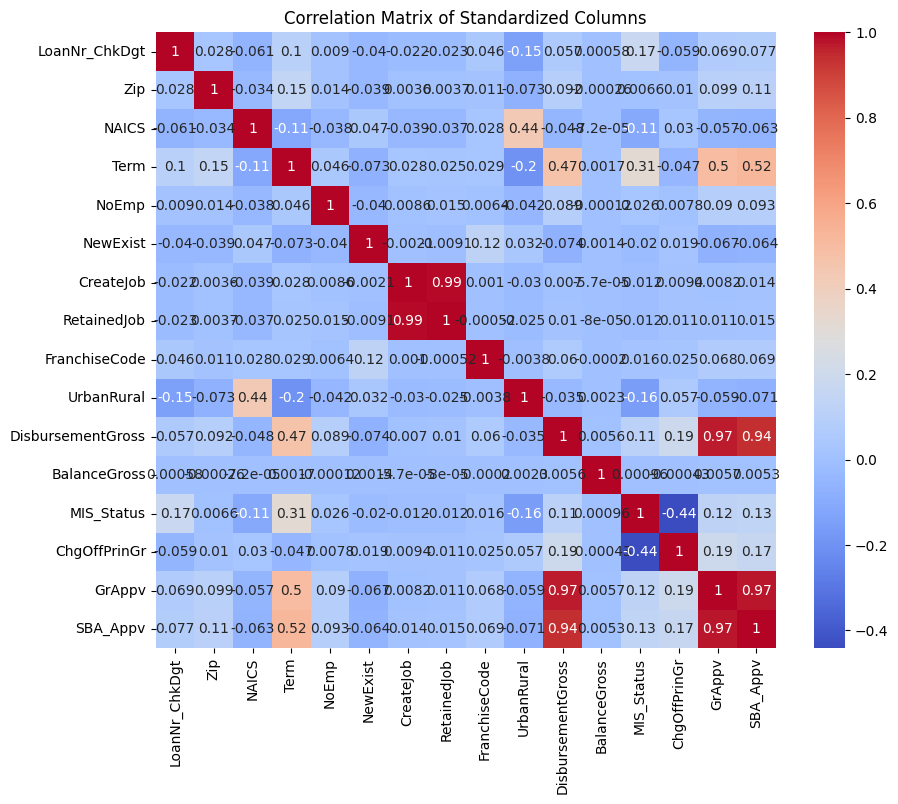

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# train[std_columns] の相関行列を求める
corr_matrix = df[numeric_columns].corr()
  
# 相関行列を図示
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Standardized Columns')
plt.show()

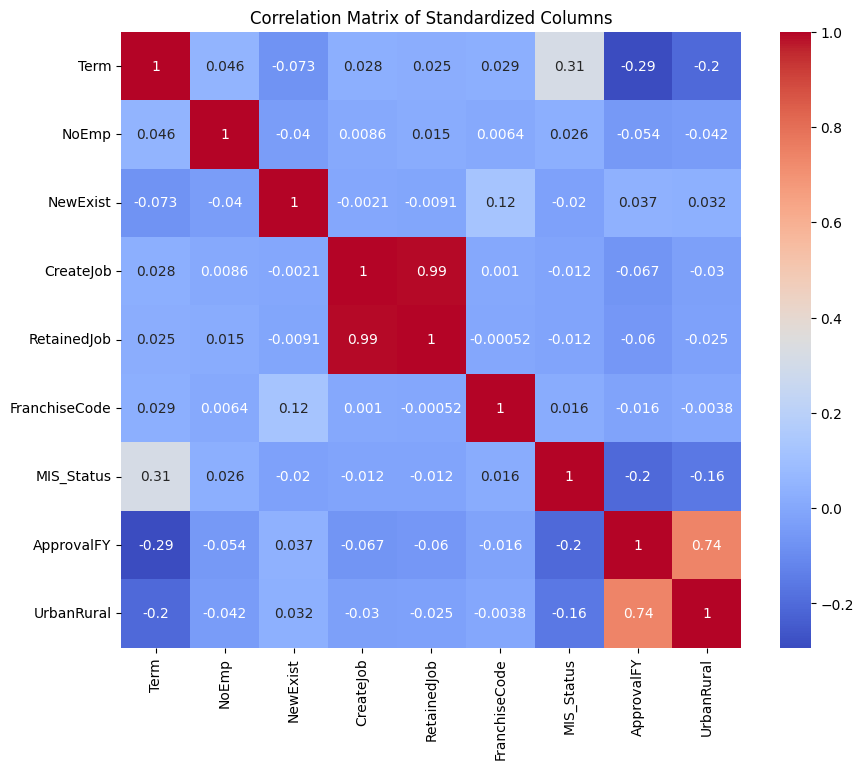

In [35]:
same_columns = ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'MIS_Status', 'ApprovalFY', 'UrbanRural']

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Handle non-numeric values and convert to numeric
df[same_columns] = df[same_columns].apply(pd.to_numeric, errors='coerce')

# Calculate correlation matrix
corr_matrix = df[same_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Standardized Columns')
plt.show()


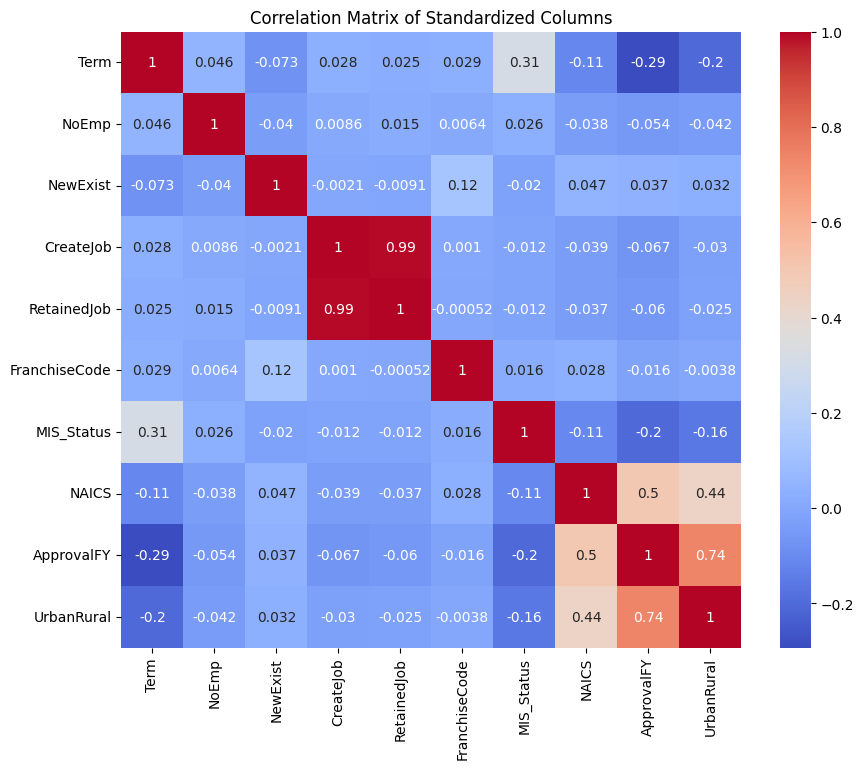

In [39]:
same_columns = ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'MIS_Status', 'NAICS','ApprovalFY', 'UrbanRural']

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Handle non-numeric values and convert to numeric
df[same_columns] = df[same_columns].apply(pd.to_numeric, errors='coerce')

# Calculate correlation matrix
corr_matrix = df[same_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Standardized Columns')
plt.show()


In [36]:
test = pd.read_csv('/workspace/kaggle/dataset/test.csv', index_col=0) # 学習用データ   # 評価用データ

test[['DisbursementGross',  'GrAppv', 'SBA_Appv']]= \
test[['DisbursementGross',  'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))



/tmp/ipykernel_1382380/2130114624.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test[['DisbursementGross',  'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))


In [40]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
  
train_numeric = df[same_columns]
  
# データの準備
X = train_numeric.drop('MIS_Status', axis=1)  # 特徴量
y = train_numeric['MIS_Status']               # 目的変数
  
# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
# LightGBMモデルの設定
lgbm = lgb.LGBMClassifier()
  
# モデルの訓練
lgbm.fit(X_train, y_train)
  
# モデルの評価
y_pred = lgbm.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[LightGBM] [Info] Number of positive: 591569, number of negative: 127762
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 719331, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.822388 -> initscore=1.532609
[LightGBM] [Info] Start training from score 1.532609
Accuracy: 0.9369915421529975


In [41]:
from sklearn.metrics import f1_score
  
mean_f1 = f1_score(y_test, y_pred, average='macro')
print(f'Mean F1 Score: {mean_f1}')

Mean F1 Score: 0.8883007092325803
